<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 55px"> 

# Project 3: Web APIs & NLP
## *02 - Preprocessing & EDA*

## **Background**

General Assembly is feeling the heat with more and more coding bootcamps popping up over the years. As an industry leader, the organization would like to keep its position and the marketing team is thus interested in streamlining and raising the effectiveness of its digital advertising efforts. They have as such, roped the data team in to provide some insights. You are part of the data team.

The starting point of most digital advertising strategies is finding the right keywords. While keywords such as 'bootcamps' and 'coding' are immediately apparent, being able to identify other less obvious ones are important here as well. Keywords that can help to differentiate similar groups of online personas into potential leads and less likely ones are appreciated.

Taking this into account and adding on the rise of social media (see [ourworldindata](https://ourworldindata.org/rise-of-social-media)) and its place in the advertising space, your team has decided to gather data from Reddit due to its uniqueness - it is a social media platform done in a forum style. Reddit contains a large amount of subreddits, which are essentially communities within the platform. According to Reddit themselves, 'there's a community for everybody'.

Each subreddit contains posts that are relevant to its topic. These features make Reddit a trove of social media-like text posts and therefore an ideal scraping candidate. 

## **Problem Statement**

This project aims to build a model with >90% accuracy that helps to identify between those who are looking for bootcamp style learning vs computer science majors/prospective students based on the words they use online.

## Contents
- [Datasets](#Load-Datasets)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

## Data Dictionary
|Feature|Type|Dataset|Description|
|:---|---:|---:|---:|
|subreddit|str|df_cbc, df_csm, df_merged|Name of Subreddit post belongs to|
|title|str|df_cbc, df_csm, df_merged|Title of post|
|created_utc|int|df_cbc, df_csm, df_merged|Timestamp of post creation|
|selftext|str|df_cbc, df_csm, df_merged|Content of post|
|all_text|str|df_cbc, df_csm, df_merged|Title and content of post combined|
|all_text_clean|str|df_cbc, df_csm, df_merged|Combined title and content that has been processed|

## Import Libraries

In [1]:
import pandas as pd
import re
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

## Load Datasets

In [2]:
df_cbc = pd.read_csv('datasets/codingbootcamp_submissions.csv')
df_csm = pd.read_csv('datasets/csmajors_submissions.csv')

In [3]:
# check to see if datasets are correct; display first 5 rows
print(df_cbc.shape)
df_cbc.head()

(4990, 4)


,subreddit,title,created_utc,selftext
0,codingbootcamp,Anyone from Toronto have advice on bootcamp ch...,1669244663,"Hello all, I'm a human biology graduate. I'm n..."
1,codingbootcamp,IronHack vs Le Wagon,1669244075,Helloo!! I‘m looking for bootcamps and the bes...
2,codingbootcamp,Is an associates degree enough?,1669243416,So I’ve been accepted into a local college tha...
3,codingbootcamp,Is freecodingbootcamp.org legit?,1669238234,I mean while it does sound too good to be true...
4,codingbootcamp,"Artist to Coder, What are my options?",1669234613,"Hey guys, so I been holding onto the idea of b..."


In [4]:
print(df_csm.shape)
df_csm.head()

(4992, 4)


,subreddit,title,created_utc,selftext
0,csMajors,Final Rounds for Expedia Mobile Engineer Intern,1669252773,Has anyone taken the final interview for the M...
1,csMajors,Is it normal to apply for multiple different p...,1669252295,I see lots of posts with people saying they ap...
2,csMajors,Google STEP/Microsoft Explore with no experience?,1669251959,Can you get into the big tech internship progr...
3,csMajors,Expedia New Grad Final Round,1669251690,Has anyone done the final round for Expedia ye...
4,csMajors,"Multimedia, fileformats and compression",1669251617,https://studienhandbuch.jku.at/93811?id=93811&...


## Data Cleaning

### \[Removed] and \[Deleted] Posts
The PushShift API pulls posts that have been removed or deleted as well. Most subreddits have posting rules that ensure submissions are not off-topic. Hence, removed or deleted posts are likely not relevant, as judged by the original poster (OP) or a moderator, and will as such not be included in the analysis. 

In [5]:
df_cbc = df_cbc[(df_cbc["selftext"] != '[removed]') & (df_cbc["selftext"] != '[deleted]')]
df_cbc

,subreddit,title,created_utc,selftext
0,codingbootcamp,Anyone from Toronto have advice on bootcamp ch...,1669244663,"Hello all, I'm a human biology graduate. I'm n..."
1,codingbootcamp,IronHack vs Le Wagon,1669244075,Helloo!! I‘m looking for bootcamps and the bes...
2,codingbootcamp,Is an associates degree enough?,1669243416,So I’ve been accepted into a local college tha...
3,codingbootcamp,Is freecodingbootcamp.org legit?,1669238234,I mean while it does sound too good to be true...
4,codingbootcamp,"Artist to Coder, What are my options?",1669234613,"Hey guys, so I been holding onto the idea of b..."
...,...,...,...,...
4985,codingbootcamp,my math skills are equal to algebra from 11 ye...,1525831870,To put it simply.. I really have my mind set o...
4986,codingbootcamp,Is a coding bootcamp right for me?,1525693933,NaN
4987,codingbootcamp,Anyone have any experience with Actualize (Any...,1524936502,I am in Chicago and they are the only ones who...
4988,codingbootcamp,The Unwritten Guide To Your Hack Reactor Inter...,1523829388,NaN


In [6]:
df_csm = df_csm[(df_csm["selftext"] != '[removed]') & (df_csm["selftext"] != '[deleted]')]
df_csm

,subreddit,title,created_utc,selftext
0,csMajors,Final Rounds for Expedia Mobile Engineer Intern,1669252773,Has anyone taken the final interview for the M...
1,csMajors,Is it normal to apply for multiple different p...,1669252295,I see lots of posts with people saying they ap...
2,csMajors,Google STEP/Microsoft Explore with no experience?,1669251959,Can you get into the big tech internship progr...
3,csMajors,Expedia New Grad Final Round,1669251690,Has anyone done the final round for Expedia ye...
4,csMajors,"Multimedia, fileformats and compression",1669251617,https://studienhandbuch.jku.at/93811?id=93811&...
...,...,...,...,...
4987,csMajors,apple epm intern interview timeline?,1665788384,"for context, i'm a ghc '22 in-person attendee ..."
4988,csMajors,Lutron Electronics New Grad Final Interview,1665788244,Has anyone recently interviewed with Lutron El...
4989,csMajors,Valkyrie Round 2,1665786853,Anyone done the Valkyrie Round 2 SWE Intern?\n...
4990,csMajors,HRT vs Citadel TC/Career/Reputation(Prestige) ...,1665785980,\n\n[View Poll](https://www.reddit.com/poll/y4...


Both subreddit datasets still have similar number of submissions after removal of '\[removed]' and '\[deleted]' submissions.

### Check for Null Values and Missing Data

In [7]:
df_cbc.isnull().sum()

subreddit         0
title             0
created_utc       0
selftext       1397
dtype: int64

In [8]:
df_csm.isnull().sum()

subreddit        0
title            0
created_utc      0
selftext       248
dtype: int64

The selftext column has a large number of null values but title doesn't, likely because reddit allows for posts without selftext. These posts typically have most of the info in the title already and are as such as important as those with selftext. The null values in selftext will thus be removed and the two columns (title and selftext) will be combined for analysis.

### Combine Title & Selftext

In [9]:
df_cbc['selftext'].fillna('', inplace=True) # Remove null values
df_cbc['all_text'] = df_cbc['title'] + " " + df_cbc['selftext']
df_cbc.head()

,subreddit,title,created_utc,selftext,all_text
0,codingbootcamp,Anyone from Toronto have advice on bootcamp ch...,1669244663,"Hello all, I'm a human biology graduate. I'm n...",Anyone from Toronto have advice on bootcamp ch...
1,codingbootcamp,IronHack vs Le Wagon,1669244075,Helloo!! I‘m looking for bootcamps and the bes...,IronHack vs Le Wagon Helloo!! I‘m looking for ...
2,codingbootcamp,Is an associates degree enough?,1669243416,So I’ve been accepted into a local college tha...,Is an associates degree enough? So I’ve been a...
3,codingbootcamp,Is freecodingbootcamp.org legit?,1669238234,I mean while it does sound too good to be true...,Is freecodingbootcamp.org legit? I mean while ...
4,codingbootcamp,"Artist to Coder, What are my options?",1669234613,"Hey guys, so I been holding onto the idea of b...","Artist to Coder, What are my options? Hey guys..."


In [10]:
df_csm['selftext'].fillna('', inplace=True) # Remove null values
df_csm['all_text'] = df_csm['title'] + " " + df_csm['selftext']
df_csm.head()

,subreddit,title,created_utc,selftext,all_text
0,csMajors,Final Rounds for Expedia Mobile Engineer Intern,1669252773,Has anyone taken the final interview for the M...,Final Rounds for Expedia Mobile Engineer Inter...
1,csMajors,Is it normal to apply for multiple different p...,1669252295,I see lots of posts with people saying they ap...,Is it normal to apply for multiple different p...
2,csMajors,Google STEP/Microsoft Explore with no experience?,1669251959,Can you get into the big tech internship progr...,Google STEP/Microsoft Explore with no experien...
3,csMajors,Expedia New Grad Final Round,1669251690,Has anyone done the final round for Expedia ye...,Expedia New Grad Final Round Has anyone done t...
4,csMajors,"Multimedia, fileformats and compression",1669251617,https://studienhandbuch.jku.at/93811?id=93811&...,"Multimedia, fileformats and compression https:..."


### Remove Unnecessary Strings/Chars/Stopwords & Lemmatize
The clean_tokens function below generates tokens from the combined title and selftext (all_text) after removal of unwanted characters and punctuation. The remaining tokens are then lemmatized and thereafter combined into a single string for vectorization.

In [11]:
# define stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['', 'im'])

# remove punctuation from stopwords for better hit
for i in range(len(stopwords)):
    stopwords[i] = re.sub(r'[^\w\s]','',stopwords[i])

# instantiate nltk lemmatizer
wn = nltk.WordNetLemmatizer()

In [12]:
def clean_strings(texts):
    list_clean = []
    for text in texts:
        # remove links
        no_html = re.sub(
            r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*',
            ' ', text, flags=re.MULTILINE)
        
        # remove usernames
        no_users = re.sub('u/[A-Za-z0-9_-]+', ' ', no_html)
        
        # remove punctuations
        no_punc = re.sub(r'[/,(_]', ' ', no_users) # punctuations that might separate meaningful words
        no_punc = re.sub(r'[^\w\s]','', no_punc) # remove other characters
        
        # tokenize
        tokens_raw = re.split('\W+', no_punc.lower()) # '\W' means not word
        
        # remove numbers & words with numbers
        tokens_no_digits = [re.sub(r'\d+', '', token) for token in tokens_raw]

        # remove non-ascii chars + lemmatize
        tokens_clean = [wn.lemmatize(word) for word in tokens_no_digits if word.isascii()==True]
        
        # remove stopwords
        tokens_clean = [word for word in tokens_clean if word not in stopwords]
        
        # join back into a clean string
        clean_string = " ".join(tokens_clean)
        
        # append to list of lemmatized words
        list_clean.append(clean_string)
        
    return list_clean

In [13]:
df_cbc['all_text_clean'] = clean_strings(df_cbc['all_text'])
df_csm['all_text_clean'] = clean_strings(df_csm['all_text'])

In [14]:
df_cbc.head()

,subreddit,title,created_utc,selftext,all_text,all_text_clean
0,codingbootcamp,Anyone from Toronto have advice on bootcamp ch...,1669244663,"Hello all, I'm a human biology graduate. I'm n...",Anyone from Toronto have advice on bootcamp ch...,anyone toronto advice bootcamp choice hello hu...
1,codingbootcamp,IronHack vs Le Wagon,1669244075,Helloo!! I‘m looking for bootcamps and the bes...,IronHack vs Le Wagon Helloo!! I‘m looking for ...,ironhack v le wagon helloo looking bootcamps b...
2,codingbootcamp,Is an associates degree enough?,1669243416,So I’ve been accepted into a local college tha...,Is an associates degree enough? So I’ve been a...,associate degree enough ive accepted local col...
3,codingbootcamp,Is freecodingbootcamp.org legit?,1669238234,I mean while it does sound too good to be true...,Is freecodingbootcamp.org legit? I mean while ...,freecodingbootcamporg legit mean doe sound goo...
4,codingbootcamp,"Artist to Coder, What are my options?",1669234613,"Hey guys, so I been holding onto the idea of b...","Artist to Coder, What are my options? Hey guys...",artist coder option hey guy holding onto idea ...


In [15]:
df_csm.head()

,subreddit,title,created_utc,selftext,all_text,all_text_clean
0,csMajors,Final Rounds for Expedia Mobile Engineer Intern,1669252773,Has anyone taken the final interview for the M...,Final Rounds for Expedia Mobile Engineer Inter...,final round expedia mobile engineer intern ha ...
1,csMajors,Is it normal to apply for multiple different p...,1669252295,I see lots of posts with people saying they ap...,Is it normal to apply for multiple different p...,normal apply multiple different position big c...
2,csMajors,Google STEP/Microsoft Explore with no experience?,1669251959,Can you get into the big tech internship progr...,Google STEP/Microsoft Explore with no experien...,google step microsoft explore experience get b...
3,csMajors,Expedia New Grad Final Round,1669251690,Has anyone done the final round for Expedia ye...,Expedia New Grad Final Round Has anyone done t...,expedia new grad final round ha anyone done fi...
4,csMajors,"Multimedia, fileformats and compression",1669251617,https://studienhandbuch.jku.at/93811?id=93811&...,"Multimedia, fileformats and compression https:...",multimedia fileformats compression university ...


## Exploratory Data Analysis
We will take a closer look at the frequencies of unigrams and bigrams in each of the subreddits.

### Frequency of Individual Words

In [16]:
# define function that shows top n words in each subreddit
def top_n(subreddit_df, ngram_range, n):
    # instantiate countvectorizer
    cv = CountVectorizer(ngram_range=ngram_range)
    
    # cv gives sparse matrix
    sparse = cv.fit_transform(subreddit_df['all_text_clean'])
    
    # obtain list of ngrams sorted by frequency
    freq = sparse.sum(axis=0)
    
    # vocabulary_ method gives a dictionary in the form {word: feature index}
    ngrams_freq = [(word, freq[0, index]) for word, index in cv.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key = lambda x: x[1], reverse=True)
    
    # Return top n most frequent ngrams
    return ngrams_freq[:n+1]

In [17]:
# define function that visualizes top 20 n-grams in each subreddit
def plot_top20(hit_list, subreddit, ngram, palette):
    fig, ax= plt.subplots(figsize=(15,6))

    sns.barplot(
        data=pd.DataFrame(hit_list, columns=['ngram', 'frequency']),
        orient='h',
        x='frequency',
        y='ngram',
        ax=ax,
        palette=palette
    )
    ax.set_title(f'r/{subreddit} Top 20 {ngram}', fontsize=20)
    ax.set_ylabel('')

    fig.tight_layout()

#### Coding Boot Camp

In [18]:
print('r/codingbootcamp top 40 words:')
top_n(df_cbc, (1,1), 40)

r/codingbootcamp top 40 words:


[('bootcamp', 3330),
 ('coding', 2729),
 ('job', 2118),
 ('would', 1811),
 ('get', 1689),
 ('wa', 1673),
 ('like', 1574),
 ('time', 1550),
 ('know', 1305),
 ('experience', 1243),
 ('camp', 1218),
 ('program', 1202),
 ('ive', 1199),
 ('anyone', 1193),
 ('course', 1178),
 ('one', 1127),
 ('want', 1112),
 ('boot', 1074),
 ('work', 1053),
 ('learn', 1035),
 ('help', 1025),
 ('looking', 1003),
 ('bootcamps', 962),
 ('year', 945),
 ('ha', 943),
 ('good', 883),
 ('week', 875),
 ('career', 831),
 ('code', 823),
 ('really', 816),
 ('people', 806),
 ('also', 804),
 ('learning', 776),
 ('need', 768),
 ('month', 731),
 ('start', 704),
 ('make', 698),
 ('question', 684),
 ('software', 677),
 ('go', 648),
 ('degree', 633)]

Unsurprisingly, the word 'bootcamp' features most prominently in the codingbootcamp subreddit. The words 'bootcamp', 'boot', and 'camp' will thus be removed.

#### csMajors

In [19]:
print('r/csMajors top 40 words:')
top_n(df_csm, (1,1), 40)

r/csMajors top 40 words:


[('interview', 2286),
 ('internship', 2114),
 ('offer', 1627),
 ('wa', 1509),
 ('anyone', 1389),
 ('company', 1356),
 ('would', 1265),
 ('get', 1231),
 ('like', 1155),
 ('know', 1045),
 ('intern', 1043),
 ('got', 985),
 ('question', 981),
 ('swe', 915),
 ('time', 912),
 ('ha', 903),
 ('one', 889),
 ('year', 855),
 ('summer', 775),
 ('round', 712),
 ('job', 701),
 ('new', 646),
 ('back', 645),
 ('also', 643),
 ('ive', 636),
 ('experience', 628),
 ('week', 622),
 ('really', 613),
 ('oa', 605),
 ('good', 603),
 ('final', 600),
 ('want', 593),
 ('work', 592),
 ('grad', 576),
 ('view', 550),
 ('poll', 549),
 ('doe', 537),
 ('take', 518),
 ('next', 516),
 ('first', 514),
 ('people', 492)]

Surprisingly, the word 'coding' is only top 20 in the codingbootcamp subreddit. But taking a closer look, the word coding is in the subreddit name and hence it should be removed as well. 

'cs' nor 'major' was not a top 20 word. 'oa' stands for online assessment.

New stopwords including 'like', 'ive', 'get', 'got', 'dont', 'know', 'one', 'want', 'week', 'good', 'also', and 'really' were identified as well. Further, words that were prominent in both subreddits were removed since they are unlikely to be relevant in categorization.

### Remove Newly Identified Stopwords

In [20]:
new_stopwords = ['like', 'ive', 'get', 'got', 'dont', 
                 'know', 'one', 'want', 'week', 'good', 
                 'also', 'really', 'bootcamp', 'bootcamps', 'boot', 
                 'camp', 'camps', 'coding', 'anyone', 'year', 'job',
                 'would', 'time', 'poll', 'work', 'question',
                 'wa', 'ha', 'go', 'experience', 'people', 'project']
stopwords.extend(new_stopwords)

In [21]:
df_cbc['all_text_clean'] = clean_strings(df_cbc['all_text'])
df_csm['all_text_clean'] = clean_strings(df_csm['all_text'])

### Visualize the New Top 20

In [22]:
print('r/codingbootcamp top 20 words:')
cbc_top20 = top_n(df_cbc, (1,1), 20)
cbc_top20

r/codingbootcamp top 20 words:


[('program', 1202),
 ('course', 1178),
 ('learn', 1035),
 ('help', 1025),
 ('looking', 1003),
 ('career', 831),
 ('code', 823),
 ('learning', 776),
 ('need', 768),
 ('month', 731),
 ('start', 704),
 ('make', 698),
 ('software', 677),
 ('degree', 633),
 ('python', 624),
 ('tech', 619),
 ('full', 605),
 ('free', 590),
 ('school', 587),
 ('much', 584),
 ('lot', 583)]

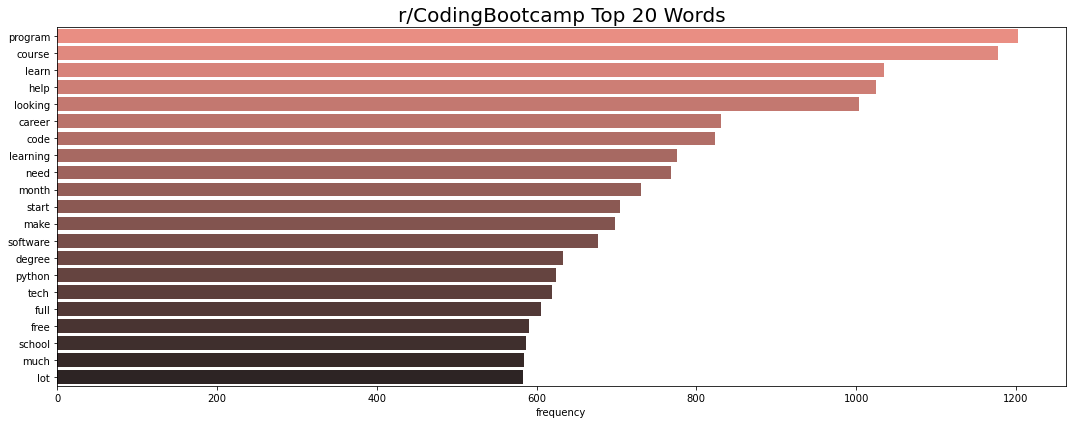

In [23]:
plot_top20(cbc_top20, 'CodingBootcamp', 'Words', 'dark:salmon_r')

In [24]:
print('r/csMajors top 20 words:')
csm_top20 = top_n(df_csm, (1,1), 20)
csm_top20

r/csMajors top 20 words:


[('interview', 2286),
 ('internship', 2114),
 ('offer', 1627),
 ('company', 1356),
 ('intern', 1043),
 ('swe', 915),
 ('summer', 775),
 ('round', 712),
 ('new', 646),
 ('back', 645),
 ('oa', 605),
 ('final', 600),
 ('grad', 576),
 ('view', 550),
 ('doe', 537),
 ('take', 518),
 ('next', 516),
 ('first', 514),
 ('recruiter', 488),
 ('think', 481),
 ('even', 465)]

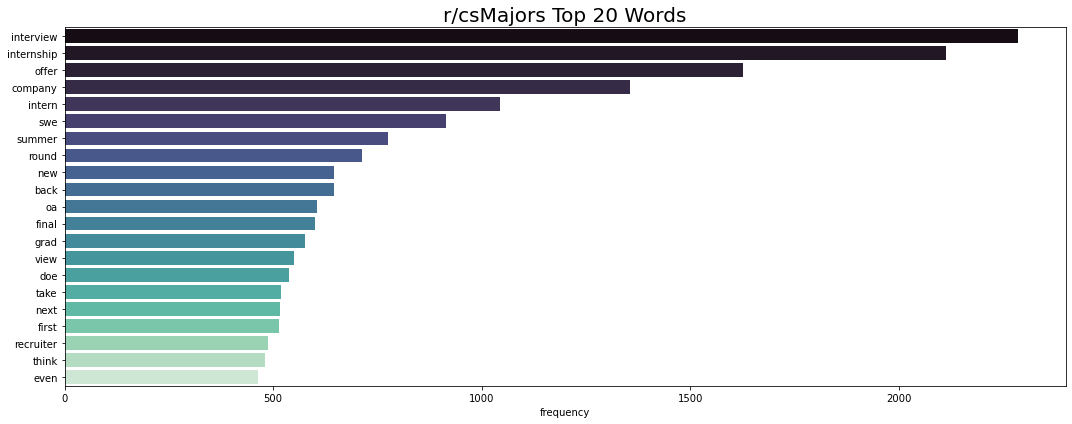

In [25]:
plot_top20(csm_top20, 'csMajors', 'Words', 'mako')

Top words for csmajors and codingbootcamp are as follows. There is some identifiable difference here, namely the focus on internships and interviews, as well as online assessments (oa)

### Bigram Frequency

In [26]:
print('r/codingbootcamp top 20 bigrams:')
cbc_top20bg = top_n(df_cbc, (2,2), 20)
cbc_top20bg

r/codingbootcamp top 20 bigrams:


[('hack reactor', 359),
 ('app academy', 308),
 ('full stack', 250),
 ('software engineering', 215),
 ('html cs', 198),
 ('general assembly', 188),
 ('web development', 186),
 ('software engineer', 175),
 ('computer science', 141),
 ('data science', 124),
 ('career change', 118),
 ('technical interview', 116),
 ('learn code', 105),
 ('tech elevator', 102),
 ('software development', 101),
 ('learning code', 101),
 ('web developer', 94),
 ('fullstack academy', 94),
 ('programming language', 90),
 ('front end', 89),
 ('thanks advance', 83)]

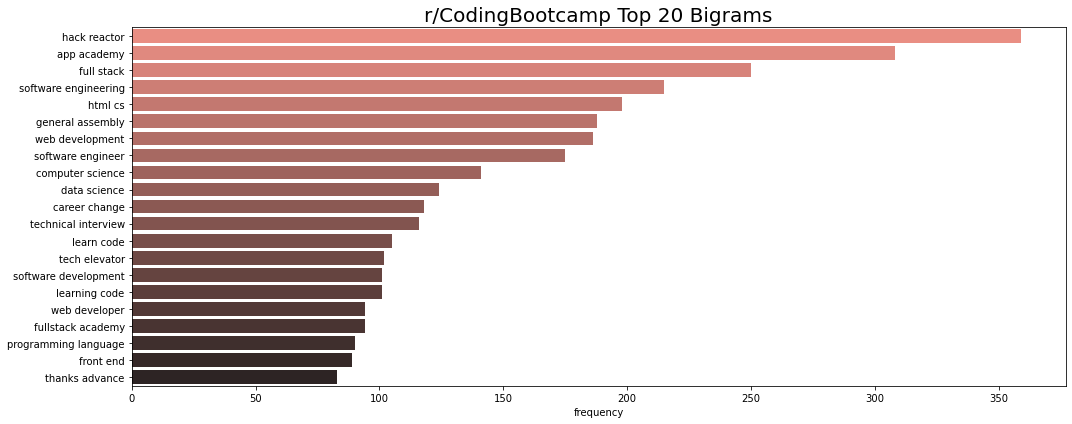

In [27]:
plot_top20(cbc_top20bg, 'CodingBootcamp', 'Bigrams', 'dark:salmon_r')

Some of the top hits for bigrams are the names of bootcamp providers. These could serve as good keywords to target since someone looking for a provider is very likely to be searching for a bootcamp. Similar to the unigrams for codingbootcamp, learning to code appears in the top 20.

In [28]:
print('r/csMajors top 20 bigrams:')
csm_top20bg = top_n(df_csm, (2,2), 20)
csm_top20bg

r/csMajors top 20 bigrams:


[('new grad', 480),
 ('final round', 313),
 ('swe intern', 273),
 ('swe internship', 208),
 ('computer science', 200),
 ('return offer', 190),
 ('heard back', 180),
 ('summer internship', 162),
 ('hear back', 154),
 ('technical interview', 148),
 ('round interview', 137),
 ('final interview', 134),
 ('google step', 117),
 ('internship offer', 117),
 ('software engineering', 111),
 ('software engineer', 111),
 ('interview process', 100),
 ('tech company', 94),
 ('removed view', 94),
 ('phone screen', 88),
 ('big tech', 82)]

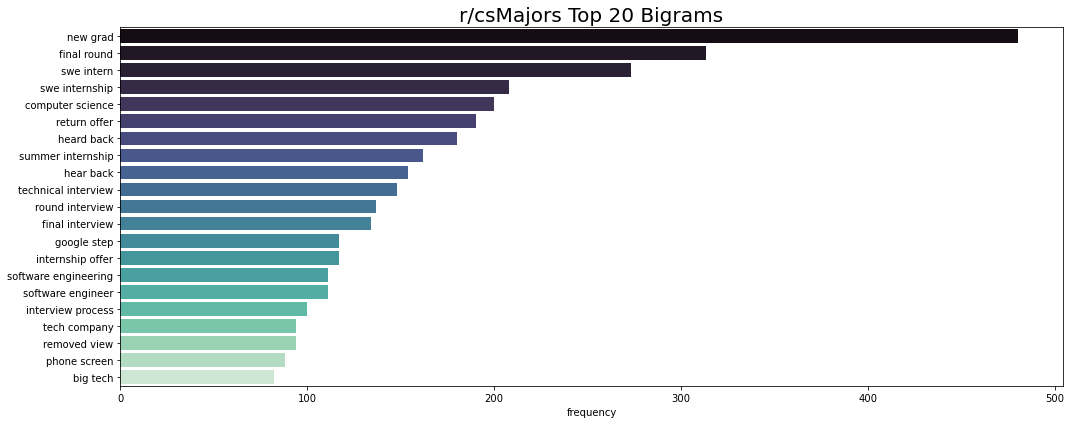

In [29]:
plot_top20(csm_top20bg, 'csMajors', 'Bigrams', 'mako')

There are a lot of bigrams related to internships, job applications, getting offers and interviews. 

### Word Cloud
Word clouds provide another form of visualization for word frequency, with more frequent words appearing larger. Word clouds allow for more words to be displayed without compromising for visibility since there are no axes.

In [30]:
def plot_cloud(subreddit_cleaned, subreddit_name, color):
    plt.figure(figsize=(12,12))
    
    #creating wordcloud parameters
    plt.imshow(WordCloud(
    width=2000,
    height=2000,
    random_state=42,
    background_color='white',
    colormap=color).generate(' '.join(subreddit_cleaned))) #must use list of cleaned submissions, not dataframe
    
    plt.axis('off')
    
    plt.title(f'r/{subreddit_name}', fontsize=50)
    plt.tight_layout();

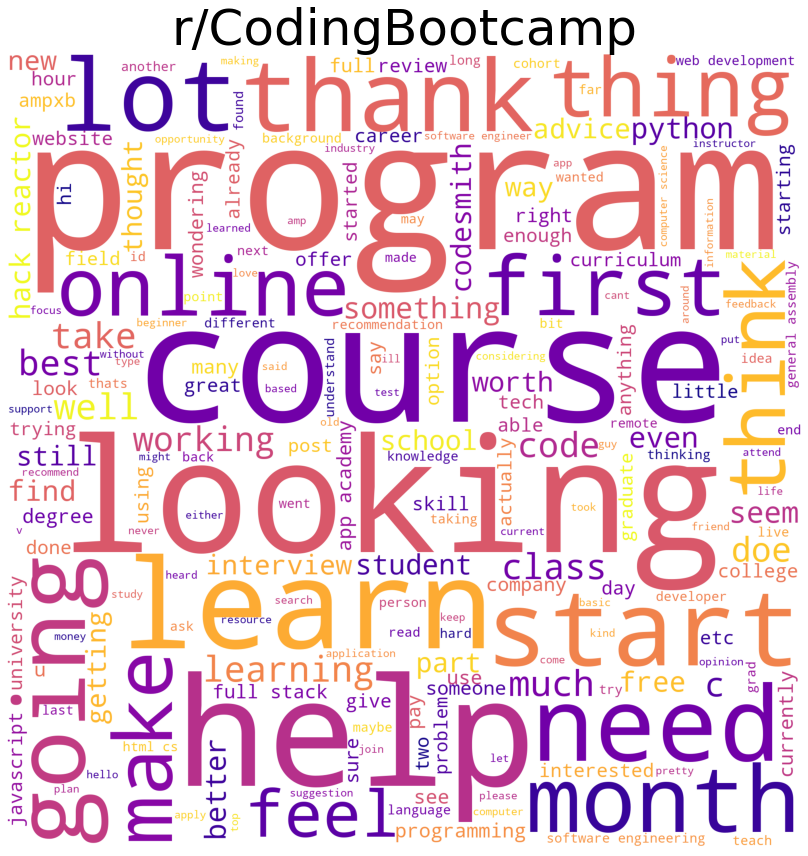

In [31]:
plot_cloud(df_cbc['all_text_clean'], 'CodingBootcamp', 'plasma')

Notable words include 'course', 'looking', 'program', 'code', which seem to be in line with what a coding bootcamp seeker might look for. Some programming languages are also mentioned rather frequently as well. Learning appears to be a big theme.

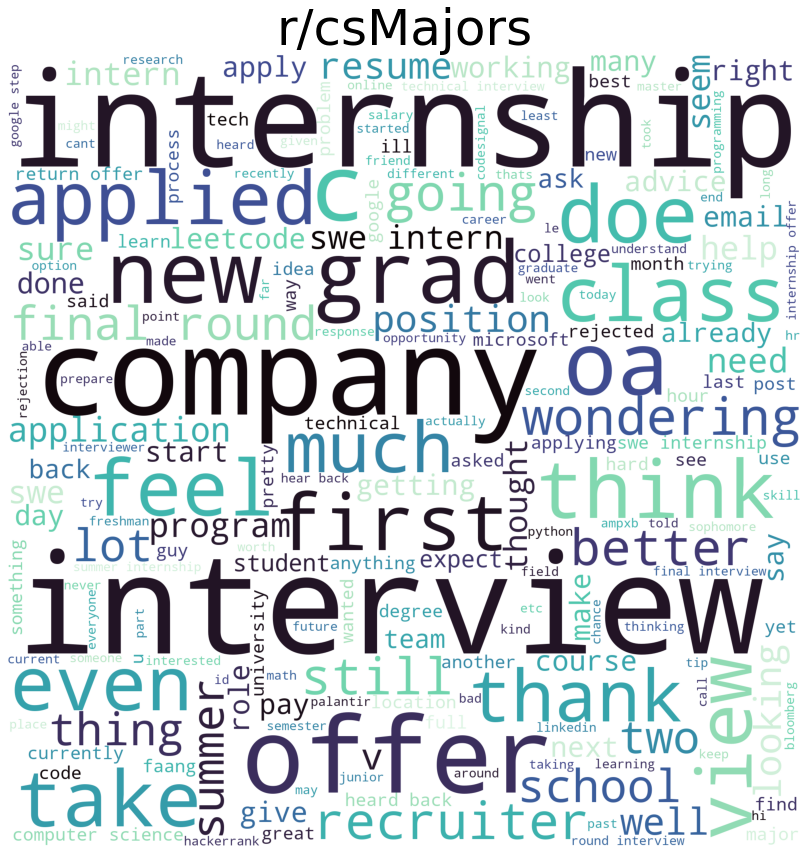

In [32]:
plot_cloud(df_csm['all_text_clean'], 'csMajors', 'mako')

Computer science majors tend to post about 'interviews', 'internships', 'swe' which stands for software engineering. There seems to be a larger focus on internships, job applications 

## Save to CSV

In [33]:
df_merged = pd.concat([df_cbc,df_csm], ignore_index=True) 

In [34]:
df_merged

,subreddit,title,created_utc,selftext,all_text,all_text_clean
0,codingbootcamp,Anyone from Toronto have advice on bootcamp ch...,1669244663,"Hello all, I'm a human biology graduate. I'm n...",Anyone from Toronto have advice on bootcamp ch...,toronto advice choice hello human biology grad...
1,codingbootcamp,IronHack vs Le Wagon,1669244075,Helloo!! I‘m looking for bootcamps and the bes...,IronHack vs Le Wagon Helloo!! I‘m looking for ...,ironhack v le wagon helloo looking best two op...
2,codingbootcamp,Is an associates degree enough?,1669243416,So I’ve been accepted into a local college tha...,Is an associates degree enough? So I’ve been a...,associate degree enough accepted local college...
3,codingbootcamp,Is freecodingbootcamp.org legit?,1669238234,I mean while it does sound too good to be true...,Is freecodingbootcamp.org legit? I mean while ...,freecodingbootcamporg legit mean doe sound tru...
4,codingbootcamp,"Artist to Coder, What are my options?",1669234613,"Hey guys, so I been holding onto the idea of b...","Artist to Coder, What are my options? Hey guys...",artist coder option hey guy holding onto idea ...
...,...,...,...,...,...,...
9054,csMajors,apple epm intern interview timeline?,1665788384,"for context, i'm a ghc '22 in-person attendee ...",apple epm intern interview timeline? for conte...,apple epm intern interview timeline context gh...
9055,csMajors,Lutron Electronics New Grad Final Interview,1665788244,Has anyone recently interviewed with Lutron El...,Lutron Electronics New Grad Final Interview Ha...,lutron electronics new grad final interview re...
9056,csMajors,Valkyrie Round 2,1665786853,Anyone done the Valkyrie Round 2 SWE Intern?\n...,Valkyrie Round 2 Anyone done the Valkyrie Roun...,valkyrie round done valkyrie round swe intern ...
9057,csMajors,HRT vs Citadel TC/Career/Reputation(Prestige) ...,1665785980,\n\n[View Poll](https://www.reddit.com/poll/y4...,HRT vs Citadel TC/Career/Reputation(Prestige) ...,hrt v citadel tc career reputation prestige pr...


In [35]:
df_merged.to_csv('datasets/merged_preprocessed.csv', index=False)

## Continued in 03 - Modelling